<a href="https://colab.research.google.com/github/VaDiLeMa/-Desaf-o-de-la-tienda-Alura/blob/main/An%C3%A1lisis_de_evasi%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
data = pd.read_json("TelecomX_Data.json")

In [92]:
df = pd.json_normalize(data.to_dict(orient='records'))


In [76]:
print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [77]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


# Valores nulos por columnas

In [78]:
print(df.isnull())

      customerID  Churn  customer.gender  customer.SeniorCitizen  \
0          False  False            False                   False   
1          False  False            False                   False   
2          False  False            False                   False   
3          False  False            False                   False   
4          False  False            False                   False   
...          ...    ...              ...                     ...   
7262       False  False            False                   False   
7263       False  False            False                   False   
7264       False  False            False                   False   
7265       False  False            False                   False   
7266       False  False            False                   False   

      customer.Partner  customer.Dependents  customer.tenure  \
0                False                False            False   
1                False                False            

#Limpieza de datos, algunos registros tienen Churn vacio,
              procedemos a eliminarlos

In [79]:
df = df[df["Churn"].isin(["Yes", "No"])]

# Numero de Clientes que se fueron Vs numero de clientes que se quedaron

In [80]:
print(df["Churn"].value_counts())


Churn
No     5174
Yes    1869
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

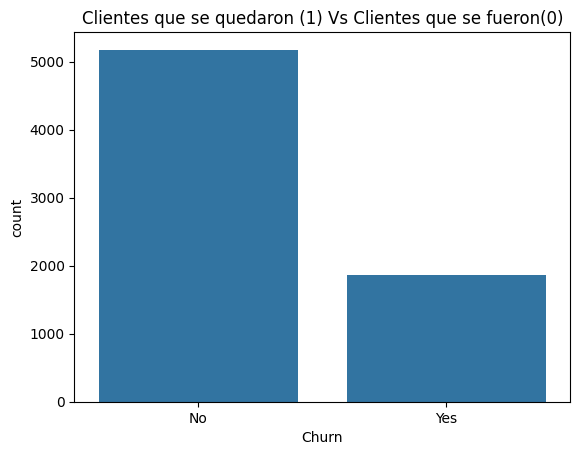

In [81]:
sns.countplot(x="Churn", data=df)
plt.title("Clientes que se quedaron (1) Vs Clientes que se fueron(0)")
plt.show

#Convertir el total a numerico

In [82]:
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")

In [83]:
df = df.fillna(0)

In [84]:
print (df.shape)

(7043, 21)


In [85]:
print(df['Churn'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
7262     No
7263    Yes
7264     No
7265     No
7266     No
Name: Churn, Length: 7043, dtype: object>


#Churn por metodo de pago

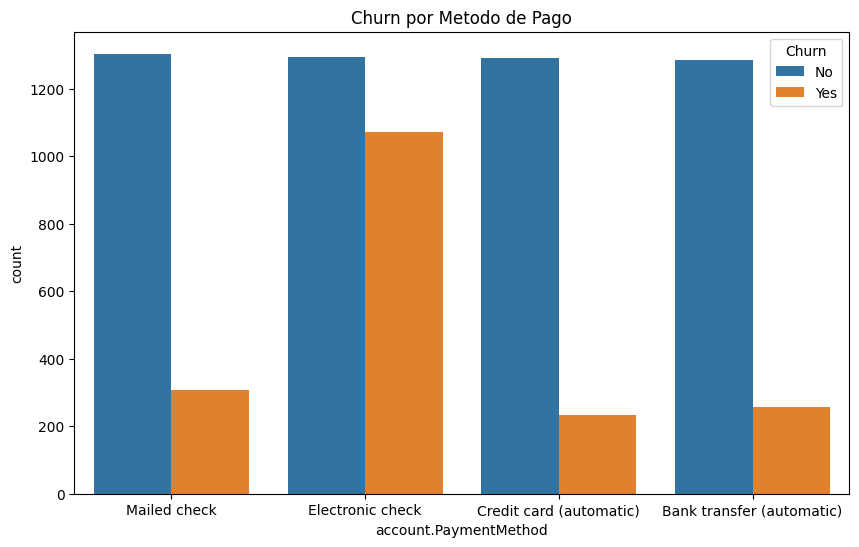

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x="account.PaymentMethod", hue="Churn", data=df)
plt.title("Churn por Metodo de Pago")
plt.show()

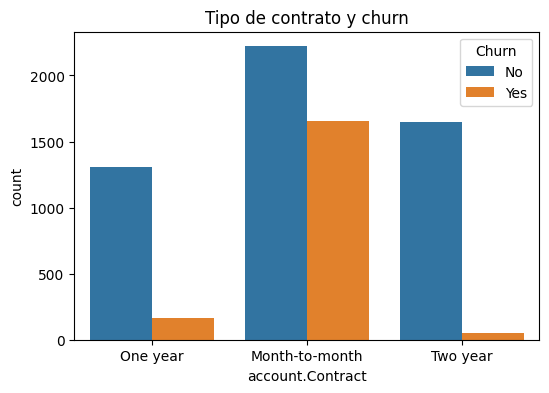

In [87]:
plt.figure(figsize=(6,4))
sns.countplot(x="account.Contract", hue="Churn", data=df)
plt.title("Tipo de contrato y churn")
plt.show()

# Transformamos variables categoricas (version simple con LabelEnconder)

In [88]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in ["customer.gender", "account.Contract", "account.PaymentMethod", "internet.InternetService"]:
  le = LabelEncoder()
  df_encoded[col] = le.fit_transform(df_encoded[col])

#Mini modelo predictivo

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x =  df_encoded[["customer.tenure","account.Charges.Monthly","account.Charges.Total",
                 "customer.gender","account.Contract","account.PaymentMethod","internet.InternetService"]]

y = df_encoded["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


Exactitud del modelo (simple): 0.7899219304471257


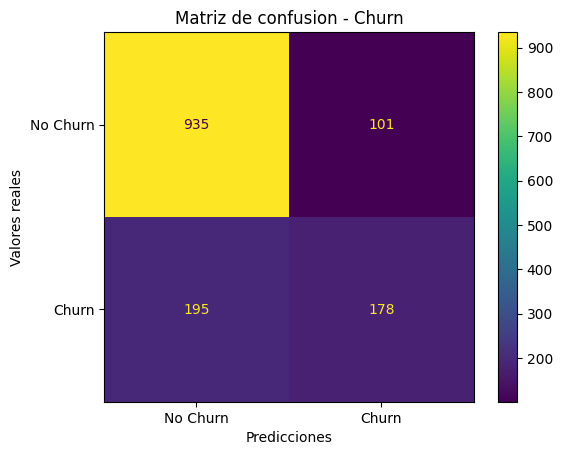

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print("\nExactitud del modelo (simple):", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot()

plt.title("Matriz de confusion - Churn")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

#Conclusiones

In [94]:
print("Loscontratos mensuales tienen más cancelaciones")
print("El modelo simple de regresión logística logra una exactitud **moderada**")
print(" El método de pago **Electronic check** aparece mucho en clientes que se fueron. ")
print(" Clientes con mayor **tenure (tiempo en la empresa)** son más leales.  ")

Loscontratos mensuales tienen más cancelaciones
El modelo simple de regresión logística logra una exactitud **moderada**
 El método de pago **Electronic check** aparece mucho en clientes que se fueron. 
 Clientes con mayor **tenure (tiempo en la empresa)** son más leales.  
